<a href="https://colab.research.google.com/github/BashayerAB/Arabic_OCR/blob/main/EfficientNetAHCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.learnpytorch.io/06_pytorch_transfer_learning/

In [ ]:
import torch
import requests
import zipfile
import os
import shutil
import random
import pathlib
import pandas as pd
import numpy as np
import torchvision

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, utils
from pathlib import Path
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt

# Lets check Pytorch version
torch.__version__

'2.2.2+cu121'

In [ ]:
# For this notebook to run with updated APIs, we need torch 1.12+ and torchvision 0.13+
try:
    import torch
    import torchvision
    assert int(torch.__version__.split(".")[1]) >= 12, "torch version should be 1.12+"
    assert int(torchvision.__version__.split(".")[1]) >= 13, "torchvision version should be 0.13+"
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")
except:
    print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
    !pip3 install -U torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")

[INFO] torch/torchvision versions not as required, installing nightly versions.
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 79.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 54.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (

torch version: 2.2.1+cu121
torchvision version: 0.17.1+cu121


In [ ]:
# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine

[INFO] Couldn't find torchinfo... installing it.
[INFO] Couldn't find going_modular scripts... downloading them from GitHub.
Cloning into 'pytorch-deep-learning'...
remote: Enumerating objects: 4056, done.
remote: Total 4056 (delta 0), reused 0 (delta 0), pack-reused 4056
Receiving objects: 100% (4056/4056), 646.90 MiB | 39.89 MiB/s, done.
Resolving deltas: 100% (2371/2371), done.
Updating files: 100% (248/248), done.


In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bashayerbinsiddiq","key":"12346bef7d07f8dc1d7b6ed2f80a0ef3"}'}

In [ ]:
#creat a kaggle folder
! mkdir ~/.kaggle

In [ ]:
#copy the kaggle.json to folder created
! cp kaggle.json ~/.kaggle/

In [ ]:
# premission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d mloey1/ahcd1

 92% 22.0M/24.0M [00:00<00:00, 113MB/s] 
100% 24.0M/24.0M [00:00<00:00, 106MB/s]


In [ ]:
!unzip ahcd1.zip


Streaming output truncated to the last 5000 lines.
  inflating: train images 13440x32x32/train/id_5500_label_16.png  
  inflating: train images 13440x32x32/train/id_5501_label_16.png  
  inflating: train images 13440x32x32/train/id_5502_label_16.png  
  inflating: train images 13440x32x32/train/id_5503_label_16.png  
  inflating: train images 13440x32x32/train/id_5504_label_16.png  
  inflating: train images 13440x32x32/train/id_5505_label_17.png  
  inflating: train images 13440x32x32/train/id_5506_label_17.png  
  inflating: train images 13440x32x32/train/id_5507_label_17.png  
  inflating: train images 13440x32x32/train/id_5508_label_17.png  
  inflating: train images 13440x32x32/train/id_5509_label_17.png  
  inflating: train images 13440x32x32/train/id_550_label_13.png  
  inflating: train images 13440x32x32/train/id_5510_label_17.png  
  inflating: train images 13440x32x32/train/id_5511_label_17.png  
  inflating: train images 13440x32x32/train/id_5512_label_17.png  
  inflating:

In [ ]:
train_image = pd.read_csv("/content/arabic handwritten characters dataset csv/csvTrainImages 13440x1024.csv", header = None)
train_label = pd.read_csv("/content/arabic handwritten characters dataset csv/csvTrainLabel 13440x1.csv", header = None)
test_image = pd.read_csv("/content/arabic handwritten characters dataset csv/csvTestImages 3360x1024.csv", header = None )
test_label = pd.read_csv("/content/arabic handwritten characters dataset csv/csvTestLabel 3360x1.csv", header = None )

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
data_path = Path("data/")
combined_dataset_dir = data_path / "AHCD_combined"
os.makedirs(combined_dataset_dir, exist_ok=True)

In [ ]:
import shutil

# Move the training dataset
train_dataset_dir = "/content/Train Images 13440x32x32/train"
for root, dirs, files in os.walk(train_dataset_dir):
    for file in files:
        src = os.path.join(root, file)
        dst = os.path.join(combined_dataset_dir, file)
        shutil.move(src, dst)

# Move the testing dataset
test_dataset_dir = "/content/Test Images 3360x32x32/test"
for root, dirs, files in os.walk(test_dataset_dir):
    for file in files:
        src = os.path.join(root, file)
        dst = os.path.join(combined_dataset_dir, file)
        shutil.move(src, dst)

combined_dataset_dir

PosixPath('data/AHCD_combined')

In [ ]:
image_path = data_path / "AHCD_orgnized"
os.makedirs(image_path, exist_ok=True)

In [ ]:
import os
import shutil

dataset_dir = "/content/data/AHCD_combined"
output_dir = "/content/data/AHCD_orgnized"
train_ratio = 0.8  # Ratio of images to be placed in the training set

# Create the training and testing folders in the output directory
train_dir = os.path.join(output_dir, "train")
test_dir = os.path.join(output_dir, "test")
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Get the list of image files in the AHCD dataset
image_files = [file for file in os.listdir(dataset_dir) if file.endswith(".png")]

# Shuffle the image files randomly
random.shuffle(image_files)

# Split the image files into training and testing sets based on the given ratio
train_count = int(train_ratio * len(image_files))
train_files = image_files[:train_count]
test_files = image_files[train_count:]

# Iterate over the training files
for file in train_files:
    # Extract the index of the letter from the image's name
    index = int(file.split("_")[3].split(".")[0])

    # Create the folder based on the extracted index if it doesn't exist
    class_dir = os.path.join(train_dir, str(index))
    os.makedirs(class_dir, exist_ok=True)

    # Move the image file to the corresponding class folder
    src = os.path.join(dataset_dir, file)
    dst = os.path.join(class_dir, file)
    shutil.copy(src, dst)

# Iterate over the testing files
for file in test_files:
    # Extract the index of the letter from the image's name
    index = int(file.split("_")[3].split(".")[0])

    # Create the folder based on the extracted index if it doesn't exist
    class_dir = os.path.join(test_dir, str(index))
    os.makedirs(class_dir, exist_ok=True)

    # Move the image file to the corresponding class folder
    src = os.path.join(dataset_dir, file)
    dst = os.path.join(class_dir, file)
    shutil.copy(src, dst)

In [ ]:
import shutil

# Specify the path of the folder to be deleted
#folder_path = "/content/data/AHCD_orgnized"

# Delete the folder
#shutil.rmtree(folder_path)

In [ ]:
# Setup Dirs
train_dir = image_path / "train"
test_dir = image_path / "test"

In [ ]:
class GrayscaleToRGB(object):
    def __call__(self, img):
        return img.convert('RGB')

In [ ]:
# Create a transforms pipeline manually (required for torchvision < 0.13)
manual_transforms = transforms.Compose([
    #GrayscaleToRGB(),
    transforms.Resize((224, 224)), # 1. Reshape all images to 224x224 (though some models may require different sizes)
    transforms.ToTensor(), # 2. Turn image values to between 0 & 1
    transforms.Normalize(mean=[0.485, 0.456, 0.406], # 3. A mean of [0.485, 0.456, 0.406] (across each colour channel)
                         std=[0.229, 0.224, 0.225]) # 4. A standard deviation of [0.229, 0.224, 0.225] (across each colour channel),
])

In [ ]:
# Create training and testing DataLoaders as well as get a list of class names
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                               test_dir=test_dir,
                                                                               transform=manual_transforms, # resize, convert images to between 0 & 1 and normalize them
                                                                               batch_size=32) # set mini-batch size to 32

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x7f19c2bf7940>,
 ['1',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '2',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9'])

In [ ]:
# Get a set of pretrained model weights
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # .DEFAULT = best available weights from pretraining on ImageNet
weights

EfficientNet_B0_Weights.IMAGENET1K_V1

In [ ]:
# Get the transforms used to create our pretrained weights
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [ ]:
# OLD: Setup the model with pretrained weights and send it to the target device (this was prior to torchvision v0.13)
# model = torchvision.models.efficientnet_b0(pretrained=True).to(device) # OLD method (with pretrained=True)

# NEW: Setup the model with pretrained weights and send it to the target device (torchvision v0.13+)
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # .DEFAULT = best available weights
model = torchvision.models.efficientnet_b0(weights=weights).to(device)

#model # uncomment to output (it's very long)

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 92.2MB/s]


In [ ]:
# Print a summary using torchinfo (uncomment for actual output)
summary(model=model,
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 1000]           --                   True
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   True
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   True
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   864                  True
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   64                   True
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 16, 112

In [ ]:
# Freeze all base layers in the "features" section of the model (the feature extractor) by setting requires_grad=False
#for param in model.features.parameters():
    #param.requires_grad = False

In [ ]:
# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)

# Recreate the classifier layer and seed it to the target device
model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=1280,
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True)).to(device)

In [ ]:
# # Do a summary *after* freezing the features and changing the output classifier layer (uncomment for actual output)
summary(model,
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape" (batch_size, color_channels, height, width)
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 28]             --                   True
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   True
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   True
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   864                  True
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   64                   True
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 16, 112

In [ ]:
# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Set the random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Setup training and save the results
results = engine.train(model=model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=10,
                       device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch: 1 | train_loss: 0.5604 | train_acc: 0.8341 | test_loss: 0.3103 | test_acc: 0.9086
Epoch: 2 | train_loss: 0.2070 | train_acc: 0.9360 | test_loss: 0.2224 | test_acc: 0.9351
Epoch: 3 | train_loss: 0.1644 | train_acc: 0.9493 | test_loss: 0.1673 | test_acc: 0.9524
Epoch: 4 | train_loss: 0.1352 | train_acc: 0.9565 | test_loss: 0.1781 | test_acc: 0.9530
Epoch: 5 | train_loss: 0.1089 | train_acc: 0.9664 | test_loss: 0.1928 | test_acc: 0.9437
Epoch: 6 | train_loss: 0.0994 | train_acc: 0.9682 | test_loss: 0.1767 | test_acc: 0.9509
Epoch: 7 | train_loss: 0.0847 | train_acc: 0.9741 | test_loss: 0.2133 | test_acc: 0.9455
Epoch: 8 | train_loss: 0.0864 | train_acc: 0.9713 | test_loss: 0.1858 | test_acc: 0.9524
Epoch: 9 | train_loss: 0.0726 | train_acc: 0.9775 | test_loss: 0.1827 | test_acc: 0.9592
Epoch: 10 | train_loss: 0.0619 | train_acc: 0.9810 | test_loss: 0.1764 | test_acc: 0.9607
[INFO] Total training time: 750.084 seconds


In [ ]:
test_accs = [0.9086,0.9351, 0.9524, 0.9530,0.9437,0.9509,0.9455,0.9524,0.9592,0.9607]
avg_test_acc = sum(test_accs) / len(test_accs)
avg_test_acc

0.9461499999999999

[INFO] Couldn't find helper_functions.py, downloading...


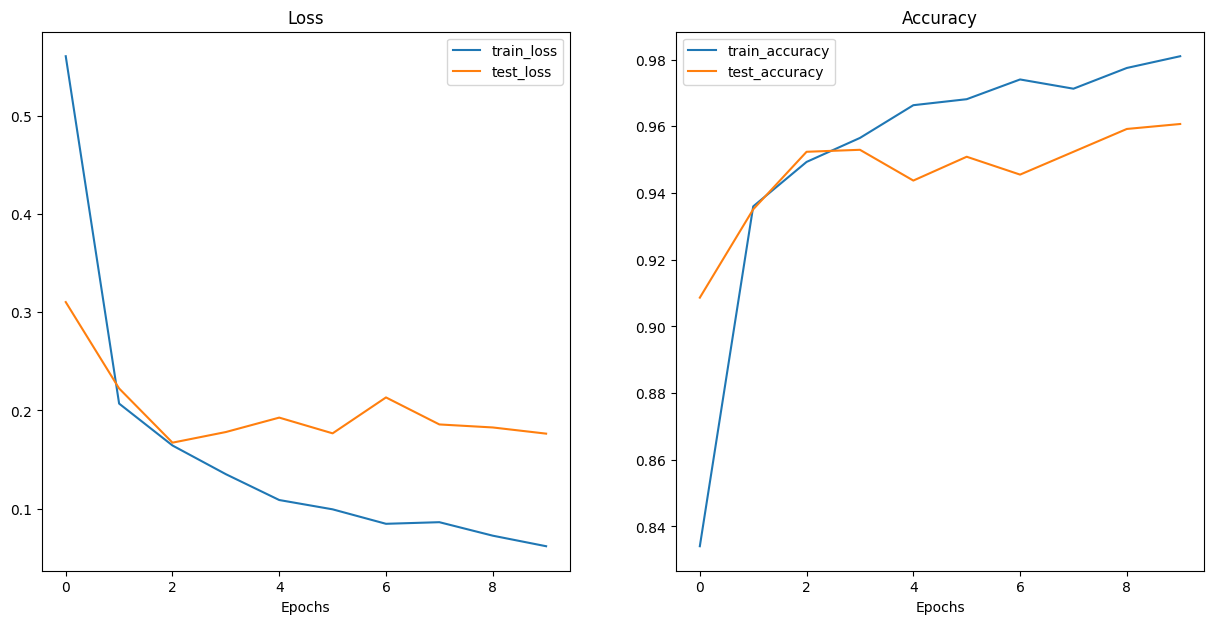

In [ ]:
# Get the plot_loss_curves() function from helper_functions.py, download the file if we don't have it
try:
    from helper_functions import plot_loss_curves
except:
    print("[INFO] Couldn't find helper_functions.py, downloading...")
    with open("helper_functions.py", "wb") as f:
        import requests
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
        f.write(request.content)
    from helper_functions import plot_loss_curves

# Plot the loss curves of our model
plot_loss_curves(results)

In [ ]:
# Create training transform with TrivialAugment
train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

# Create testing transform (no data augmentation)
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [ ]:
# Turn image folders into Datasets
train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform_trivial_augment)
test_data_simple = datasets.ImageFolder(test_dir, transform=test_transform)

train_data_augmented, test_data_simple

In [ ]:
# Turn Datasets into DataLoader's
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

train_dataloader_augmented, test_dataloader

In [ ]:
# Create model_1 and send it to the target device
torch.manual_seed(42)
model_1 = TinyVGG(
    input_shape=3,
    hidden_units=10,
    output_shape=len(train_data_augmented.classes)).to(device)
model_1

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

y_pred = []
y_true = []

# iterate over test data
for inputs, labels in test_dataloader:
    inputs = inputs.to(device)  # Move inputs to GPU
    labels = labels.to(device)  # Move labels to GPU

    output = model(inputs)  # Feed Network
    output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
    y_pred.extend(output)  # Save Prediction

    labels = labels.data.cpu().numpy()
    y_true.extend(labels)  # Save Truth

# Move y_true to GPU
y_true = torch.tensor(y_true, dtype=torch.long, device=device)

# constant for classes
classes = ('1', '2', '3', '4', '5',
           '6', '7', '8', '9', '10',
           '11', '12', '13', '14', '15',
           '16', '17', '18', '19', '20',
           '21', '22', '23', '24', '25',
           '26', '27', '28')

# Build confusion matrix
cf_matrix = confusion_matrix(y_true.cpu(), y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index=[i for i in classes],
                     columns=[i for i in classes])
plt.figure(figsize=(12, 7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')

In [ ]:
from typing import List, Tuple
from PIL import Image

def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str],
                        image_size: Tuple[int, int] = (224, 224),
                        transform: torchvision.transforms = None,
                        device: torch.device = device):

    # Open image
    img = Image.open(image_path)

    # Convert grayscale image to RGB if necessary
    if img.mode != "RGB":
        img = img.convert("RGB")

    # Create transformation for image
    if transform is not None:
        image_transform = transform
    else:
        image_transform = transforms.Compose([
            transforms.Resize(image_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),
        ])

    # Predict on image
    model.to(device)
    model.eval()
    with torch.inference_mode():
        transformed_image = image_transform(img).unsqueeze(dim=0)
        target_image_pred = model(transformed_image.to(device))

    # Convert logits -> prediction probabilities
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # Plot image with predicted label and probability
    plt.figure()
    plt.imshow(img)
    plt.title(f"Pred: {class_names[target_image_pred_label.item()]} | Prob: {target_image_pred_probs.max():.3f}")
    plt.axis(False)

In [ ]:
# Get a random list of image paths from test set
import random
num_images_to_plot = 3
test_image_path_list = list(Path(test_dir).glob("*/*.png")) # get list all image paths from test data
test_image_path_sample = random.sample(population=test_image_path_list, # go through all of the test image paths
                                       k=num_images_to_plot) # randomly select 'k' image paths to pred and plot

# Make predictions on and plot the images
for image_path in test_image_path_sample:
    pred_and_plot_image(model=model,
                        image_path=image_path,
                        class_names=class_names,
                        #transform=weights.transforms(), # optionally pass in a specified transform from our pretrained model weights
                        image_size=(224, 224))

In [ ]:
# Create training transform with TrivialAugment
train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

# Create testing transform (no data augmentation)
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [ ]:
# Turn image folders into Datasets
train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform_trivial_augment)
test_data_simple = datasets.ImageFolder(test_dir, transform=test_transform)

train_data_augmented, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 13344
     Root location: data/AHCD_orgnized/train
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 3336
     Root location: data/AHCD_orgnized/test
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [ ]:
# Turn Datasets into DataLoader's
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

train_dataloader_augmented, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f19bafbd7e0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f19c2bf7550>)

In [ ]:
# Create model_1 and send it to the target device
torch.manual_seed(42)
model_1= torchvision.models.efficientnet_b0(weights=weights).to(device)
model_1.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=1280,
                    out_features=output_shape, # same number of output units as our number of classes
                   bias=True)).to(device)
#TinyVGG(
 #   input_shape=3,
  #  hidden_units=10,
   # output_shape=len(train_data_augmented.classes)).to(device)
model_1

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [ ]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 10

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_1
model_1_results = engine.train(model=model_1,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=10,
                       device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.1898 | train_acc: 0.9405 | test_loss: 0.2740 | test_acc: 0.9190
Epoch: 2 | train_loss: 0.1517 | train_acc: 0.9524 | test_loss: 0.2079 | test_acc: 0.9449
Epoch: 3 | train_loss: 0.1312 | train_acc: 0.9571 | test_loss: 0.2205 | test_acc: 0.9414
Epoch: 4 | train_loss: 0.1069 | train_acc: 0.9663 | test_loss: 0.1828 | test_acc: 0.9536
Epoch: 5 | train_loss: 0.0907 | train_acc: 0.9705 | test_loss: 0.1640 | test_acc: 0.9536
Epoch: 6 | train_loss: 0.0714 | train_acc: 0.9769 | test_loss: 0.1969 | test_acc: 0.9509
Epoch: 7 | train_loss: 0.0707 | train_acc: 0.9792 | test_loss: 0.2043 | test_acc: 0.9577
Epoch: 8 | train_loss: 0.0689 | train_acc: 0.9777 | test_loss: 0.1618 | test_acc: 0.9577
Epoch: 9 | train_loss: 0.0680 | train_acc: 0.9779 | test_loss: 0.2105 | test_acc: 0.9503
Epoch: 10 | train_loss: 0.0537 | train_acc: 0.9832 | test_loss: 0.1897 | test_acc: 0.9598
Total training time: 749.234 seconds


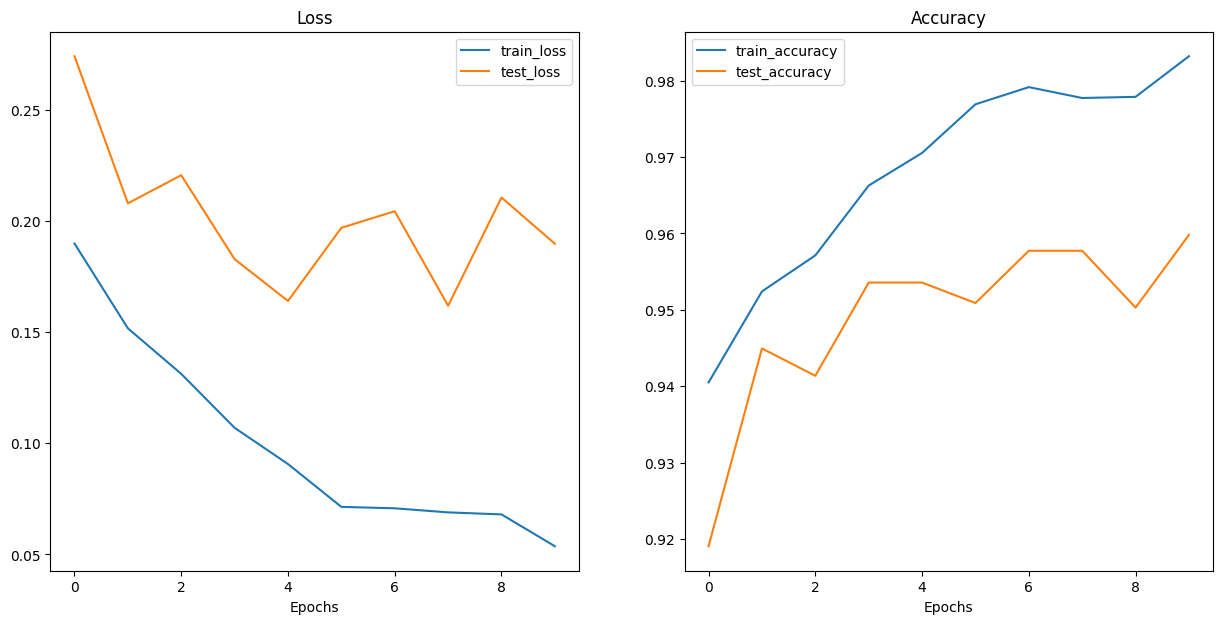

In [ ]:
plot_loss_curves(model_1_results)

In [ ]:
from PIL import Image
import torchvision.transforms as transforms

# Define the path of the image
image_path = "/content/data/AHCD_orgnized/train/10/id_10153_label_10.png"

# Open the image using PIL
image = Image.open(image_path)

# Convert the image to a PyTorch tensor
transform = transforms.ToTensor()
tensor_image = transform(image)

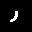

In [ ]:
image

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import os

# Specify the image path in your Google Drive
image_path = "/content/drive/MyDrive/char2_2.jpg"

# Specify the path where you want to save the downloaded image in Colab
save_directory = '/content/'
save_filename = 'image3.jpg'

# Download and save the image
transform = transforms.ToTensor()
image = Image.open(image_path)
image_tensor = transform(image)

save_path = os.path.join(save_directory, save_filename)
torchvision.utils.save_image(image_tensor, save_path)

In [ ]:
import os
import torchvision
from pathlib import Path

# Define the path of the image
custom_image_path = "/content/image3.jpg"

# Check if the image file exists
if os.path.isfile(custom_image_path):
    # Read in custom image
    custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

    # Print out image data
    print(f"Custom image tensor:\n{custom_image_uint8}\n")
    print(f"Custom image shape: {custom_image_uint8.shape}\n")
    print(f"Custom image dtype: {custom_image_uint8.dtype}")
else:
    print(f"The image file at {custom_image_path} does not exist.")

Custom image tensor:
tensor([[[255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         ...,
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255]],

        [[255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         ...,
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255]],

        [[255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         ...,
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255]]], dtype=torch.uint8)

Custom image shape: torch.Size([3, 287, 287])

Custom image dtype

In [ ]:
import torchvision

# Read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

# Print out image data
print(f"Custom image tensor:\n{custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")

Custom image tensor:
tensor([[[255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         ...,
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255]],

        [[255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         ...,
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255]],

        [[255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         ...,
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255]]], dtype=torch.uint8)

Custom image shape: torch.Size([3, 287, 287])

Custom image dtype

In [ ]:
# Try to make a prediction on image in uint8 format (this will error)
model_1.eval()
with torch.inference_mode():
    model_1(custom_image_uint8.to(device))

RuntimeError: Input type (torch.cuda.ByteTensor) and weight type (torch.cuda.FloatTensor) should be the same

In [ ]:
# Load in custom image and convert the tensor values to float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255.

# Print out image data
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])

Custom image shape: torch.Size([3, 287, 287])

Custom image dtype: torch.float32


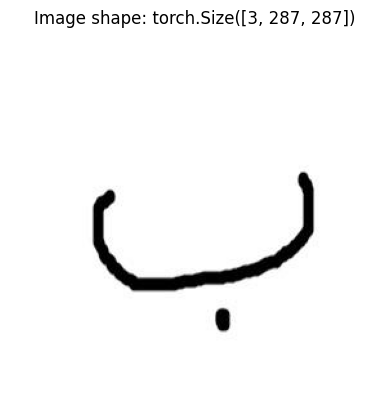

In [ ]:
# Plot custom image
plt.imshow(custom_image.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False);

In [ ]:
# Create transform pipleine to resize image
custom_image_transform = transforms.Compose([
    transforms.Resize((224, 224)), # 1. Reshape all images to 224x224 (though some models may require different sizes)

])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)

# Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 287, 287])
New shape: torch.Size([3, 224, 224])


In [ ]:
model_1.eval()
with torch.inference_mode():
    # Add an extra dimension to image
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)

    # Print out different shapes
    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")

    # Make a prediction on image with an extra dimension
    custom_image_pred = model_1(custom_image_transformed.unsqueeze(dim=0).to(device))

Custom image transformed shape: torch.Size([3, 224, 224])
Unsqueezed custom image shape: torch.Size([1, 3, 224, 224])


In [ ]:
custom_image_pred

tensor([[-0.3277,  4.3352,  0.1094,  4.3677, -1.0794,  2.4385,  0.1330, -1.8748,
         -4.6385,  1.0214, -2.5344,  4.4157,  1.2190,  0.1102,  1.0451,  4.4243,
         -1.3346,  6.3956, -1.1702, -0.0401,  1.2745,  4.8986,  0.9879, -2.2062,
          2.3003, -1.6997,  2.2329, -0.8176]], device='cuda:0')

In [ ]:
# Print out prediction logits
print(f"Prediction logits: {custom_image_pred}")

# Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

# Convert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

Prediction logits: tensor([[-0.3277,  4.3352,  0.1094,  4.3677, -1.0794,  2.4385,  0.1330, -1.8748,
         -4.6385,  1.0214, -2.5344,  4.4157,  1.2190,  0.1102,  1.0451,  4.4243,
         -1.3346,  6.3956, -1.1702, -0.0401,  1.2745,  4.8986,  0.9879, -2.2062,
          2.3003, -1.6997,  2.2329, -0.8176]], device='cuda:0')
Prediction probabilities: tensor([[6.5056e-04, 6.8922e-02, 1.0071e-03, 7.1198e-02, 3.0676e-04, 1.0342e-02,
         1.0312e-03, 1.3848e-04, 8.7323e-06, 2.5071e-03, 7.1597e-05, 7.4697e-02,
         3.0548e-03, 1.0080e-03, 2.5672e-03, 7.5338e-02, 2.3766e-04, 5.4095e-01,
         2.8014e-04, 8.6730e-04, 3.2293e-03, 1.2107e-01, 2.4245e-03, 9.9412e-05,
         9.0071e-03, 1.6497e-04, 8.4203e-03, 3.9856e-04]], device='cuda:0')
Prediction label: tensor([17], device='cuda:0')


In [ ]:
# Find the predicted label
custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
custom_image_pred_class

'25'

In [ ]:
# The values of the prediction probabilities are quite similar
custom_image_pred_probs

tensor([[6.5056e-04, 6.8922e-02, 1.0071e-03, 7.1198e-02, 3.0676e-04, 1.0342e-02,
         1.0312e-03, 1.3848e-04, 8.7323e-06, 2.5071e-03, 7.1597e-05, 7.4697e-02,
         3.0548e-03, 1.0080e-03, 2.5672e-03, 7.5338e-02, 2.3766e-04, 5.4095e-01,
         2.8014e-04, 8.6730e-04, 3.2293e-03, 1.2107e-01, 2.4245e-03, 9.9412e-05,
         9.0071e-03, 1.6497e-04, 8.4203e-03, 3.9856e-04]], device='cuda:0')

In [ ]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform=None,
                        device: torch.device = device):
    """Makes a prediction on a target image and plots the image with its prediction."""

    # 1. Load in image and convert the tensor values to float32
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

    # 2. Divide the image pixel values by 255 to get them between [0, 1]
    target_image = target_image / 255.

    # 3. Transform if necessary
    if transform:
        target_image = transform(target_image)

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(dim=0)

        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image.to(device))

    # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 8. Plot the image alongside the prediction and prediction probability
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # make sure it's the right size for matplotlib
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else:
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False);

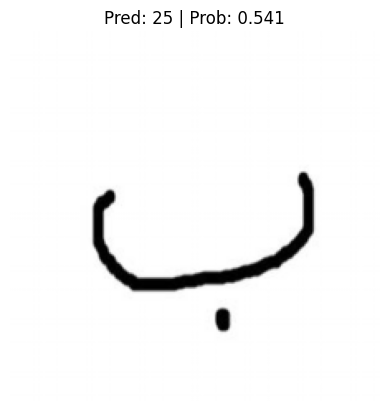

In [ ]:
# Pred on our custom image
pred_and_plot_image(model=model_1,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)

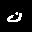

In [ ]:
from PIL import Image
import torchvision.transforms as transforms

# Define the path of the image
image_path = "/content/data/AHCD_orgnized/train/25/id_1001_label_25.png"

# Open the image using PIL
image = Image.open(image_path)

# Convert the image to a PyTorch tensor
transform = transforms.ToTensor()
tensor_image = transform(image)
image

PyTorch Lightening layer

In [ ]:
pip install pytorch-lightning

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import pytorch_lightning as pl
#from efficientnet_pytorch import EfficientNet

class YourModel(pl.LightningModule):
    def __init__(self, class_names, num_classes):
        super(YourModel, self).__init__()
        self.class_names = class_names
        self.num_classes = num_classes

        # Load the pretrained EfficientNet-B0 model
        self.backbone = EfficientNet.from_pretrained('efficientnet-b0')

        # Modify the classifier head
        self.backbone._fc = nn.Sequential(
            nn.Dropout(p=0.2, inplace=True),
            nn.Linear(in_features=self.backbone._fc.in_features, out_features=self.num_classes, bias=True)
        )

    def forward(self, x):
        # Forward pass through the EfficientNet backbone
        x = self.backbone(x)
        return x

    def training_step(self, batch, batch_idx):
        # Define the training logic here
        inputs, targets = batch

        # Forward pass
        outputs = self.forward(inputs)

        # Compute the loss
        loss = self.loss_fn(outputs, targets)

        # Perform backpropagation and update model parameters
        self.log('train_loss', loss)  # Log the training loss for visualization

        return loss

    def validation_step(self, batch, batch_idx):
        # Define the validation logic here
        inputs, targets = batch

        # Forward pass
        outputs = self.forward(inputs)

        # Compute the loss
        loss = self.loss_fn(outputs, targets)

        self.log('val_loss', loss)  # Log the validation loss for visualization

        return loss

    def configure_optimizers(self):
        # Define your optimizer
        optimizer = optim.Adam(self.parameters(), lr=0.001)
        return optimizer

    def train_dataloader(self):
        # Define your training dataloader

    def val_dataloader(self):
        # Define your validation dataloader